# Visualizing sports data: baseball

In this notebook we're going to look at ways of visualizing performance in baseball. Our data was obtained from MLBAM (Major League Baseball Advanced Media) which make available online play-by-play statistics that can be used for data analytics. The data is produced annually, and in any season there are around 200,000 individual events in Major League Baseball. This data will prove extemely useful in the next course: Moneyball and Beyond. 

Our analysis here is going to focus on where the ball was hit, which is recorded using (x, y) co-ordinates. This data is  easy to graph and is illuminating. 

We're going to look at five different ways to visualize the data:

1. Locations of hits broken down by singles, doubles, triples and home runs (for those not familiar with baseball this refers to base reached by the batter following a hit- first, second or third base, or, in the case of a home run, all run bases to score a run).
2. Locations by hits (where the batter successfully reaches a base) versus outs (where the runner is caught or thrown out).
3. Locations by handedness - to show the difference between lefties and righties.
4. Locations by individual batters- to show how batters differ.
5. Locations by stadium 

Graphs which show the distribution of locations are sometimes called "heatmaps" - because they show not only location, but the frequency with which a particular location appears. At a later stage we will look at the code for generating a more advanced heatmap, but in this notebook we're going to create very simple ones.

In [1]:
# Import the packages we need
# matplotlib will enable us to produce all our dataplots in this session.

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in MLBAM Data for 2018

MLBAM18 = pd.read_csv("../../Data/Week 3/MLBAM18.csv")
MLBAM18.drop(['Unnamed: 0'], axis=1, inplace=True)
pd.set_option('display.max_columns', 100)
display(MLBAM18)

,inning,batterId,pitcherId,event,x,y,ab_num,timestamp,stand,throws,runnerMovement,half,balls,strikes,endOuts,actionId,description,game_type,home_team,home_teamId,home_lg,away_team,away_teamId,away_lg,venueId,stadium,field_teamId,playerId.1B,playerId.2B,playerId.3B,playerId.C,playerId.CF,playerId.LF,playerId.RF,playerId.SS,batterPos,batterName,pitcherName,runsOnPlay,startOuts,runsInInning,runsITD,runsFuture,start1B,start2B,start3B,end1B,end2B,end3B,outsInInning,startCode,endCode,fielderId,gameId,isPA,isAB,isHit,isBIP,our.x,our.y,r,theta
0,1,664023,570632,Home Run,233.22,70.48,1,2018-03-29 16:43:11,L,R,[664023:::T:Home Run],top,0,0,0,NaN,Ian Happ homers (1) on a fly ball to right fie...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,CF,"Happ, I",Urena,1,0,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,True,False,270.081515,320.743636,419.309557,0.870937
1,1,592178,570632,Walk,NaN,NaN,2,2018-03-29 16:43:56,R,R,[592178::1B::Walk],top,4,2,0,NaN,Kris Bryant walks.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,3B,Bryant,Urena,0,0,3,1,2,NaN,NaN,NaN,592178.0,NaN,NaN,3,0,1,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
2,1,519203,570632,Hit By Pitch,NaN,NaN,3,2018-03-29 16:46:24,L,R,[592178:1B:2B::Hit By Pitch][519203::1B::Hit B...,top,1,2,0,NaN,Anthony Rizzo hit by pitch. Kris Bryant to ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,1B,Rizzo,Urena,0,0,3,1,2,592178.0,NaN,NaN,519203.0,592178.0,NaN,3,1,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
3,1,575929,570632,Strikeout,NaN,NaN,4,2018-03-29 16:48:44,R,R,NaN,top,2,3,1,NaN,Willson Contreras strikes out swinging.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,C,Contreras,Urena,0,0,3,1,2,519203.0,592178.0,NaN,519203.0,592178.0,NaN,3,3,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,False,NaN,NaN,NaN,NaN
4,1,656941,570632,Groundout,148.05,164.76,5,2018-03-29 16:52:10,L,R,[519203:1B:2B::Groundout][592178:2B:3B::Ground...,top,2,2,2,NaN,"Kyle Schwarber grounds out, first baseman Just...",R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,LF,Schwarber,Urena,0,1,3,1,2,519203.0,592178.0,NaN,NaN,519203.0,592178.0,3,3,6,571506.0,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,True,57.525216,85.451775,103.010467,0.978292
5,1,608365,570632,Hit By Pitch,NaN,NaN,6,2018-03-29 16:54:56,R,R,[608365::1B::Hit By Pitch],top,1,1,2,NaN,Addison Russell hit by pitch.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,SS,Russell,Urena,0,2,3,1,2,NaN,519203.0,592178.0,608365.0,519203.0,592178.0,3,6,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
6,1,518792,570632,Walk,NaN,NaN,7,2018-03-29 16:56:54,L,R,[608365:1B:2B::Walk][519203:2B:3B::Walk][59217...,top,4,0,2,NaN,Jason Heyward walks. Kris Bryant scores. ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,RF,Heyward,Urena,1,2,3,1,2,608365.0,519203.0,592178.0,518792.0,608365.0,519203.0,3,7,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
7,1,595879,570632,Hit By Pitch,NaN,NaN,8,2018-03-29 16:59:56,R,R,[518792:1B:2B::Hit By Pitch][608365:2B:3B::Hit...,top,0,0,2,NaN,Javier Baez hit by pitch. Anthony Rizzo sco...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,2B,"Baez, J",Urena,1,2,3,2,1,518792.0,608365.0,519203.0,595879.0,518792.0,608365.0,3,7,7,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
8,1,452657,570632,Groundout,143.81,152.04,9,2018-03-29 17:01:12,L,R,[595879:1B:::Groundout][518792:2B:::Groundout]...,top,2,2,3,NaN,"Jon Lester grounds out, second baseman Star

In [3]:
# The dataframe contains a lot of variables - most of which we won't need for this exercise

print(MLBAM18.columns.tolist())

['inning', 'batterId', 'pitcherId', 'event', 'x', 'y', 'ab_num', 'timestamp', 'stand', 'throws', 'runnerMovement', 'half', 'balls', 'strikes', 'endOuts', 'actionId', 'description', 'game_type', 'home_team', 'home_teamId', 'home_lg', 'away_team', 'away_teamId', 'away_lg', 'venueId', 'stadium', 'field_teamId', 'playerId.1B', 'playerId.2B', 'playerId.3B', 'playerId.C', 'playerId.CF', 'playerId.LF', 'playerId.RF', 'playerId.SS', 'batterPos', 'batterName', 'pitcherName', 'runsOnPlay', 'startOuts', 'runsInInning', 'runsITD', 'runsFuture', 'start1B', 'start2B', 'start3B', 'end1B', 'end2B', 'end3B', 'outsInInning', 'startCode', 'endCode', 'fielderId', 'gameId', 'isPA', 'isAB', 'isHit', 'isBIP', 'our.x', 'our.y', 'r', 'theta']


So we now restrict the data to a manageable set of variables. Note that the data contains co-ordinates 'x' and 'y' as well as 'our.x' and 'our.y' The difference here is the point of view: 'x' and'y' are looking toward the batter from the bleachers, 'our.x' and 'our.y' are looking from behind the batter. We'll adopt the more conventional view by using 'our.x' and 'our.y'.

In [4]:
# Limiting the set of variables

MLBmap = MLBAM18[['gameId','home_team','away_team','stadium','inning', 'batterId', 'batterName',\
                  'pitcherId', 'pitcherName','event','timestamp','stand', 'throws','x','y','our.x','our.y']]
MLBmap

,gameId,home_team,away_team,stadium,inning,batterId,batterName,pitcherId,pitcherName,event,timestamp,stand,throws,x,y,our.x,our.y
0,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,664023,"Happ, I",570632,Urena,Home Run,2018-03-29 16:43:11,L,R,233.22,70.48,270.081515,320.743636
1,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,592178,Bryant,570632,Urena,Walk,2018-03-29 16:43:56,R,R,NaN,NaN,NaN,NaN
2,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,519203,Rizzo,570632,Urena,Hit By Pitch,2018-03-29 16:46:24,L,R,NaN,NaN,NaN,NaN
3,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,575929,Contreras,570632,Urena,Strikeout,2018-03-29 16:48:44,R,R,NaN,NaN,NaN,NaN
4,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,656941,Schwarber,570632,Urena,Groundout,2018-03-29 16:52:10,L,R,148.05,164.76,57.525216,85.451775
5,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,608365,Russell,570632,Urena,Hit By Pitch,2018-03-29 16:54:56,R,R,NaN,NaN,NaN,NaN
6,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,518792,Heyward,570632,Urena,Walk,2018-03-29 16:56:54,L,R,NaN,NaN,NaN,NaN
7,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,595879,"Baez, J",570632,Urena,Hit By Pitch,2018-03-29 16:59:56,R,R,NaN,NaN,NaN,NaN
8,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,452657,Lester,570632,Urena,Groundout,2018-03-29 17:01:12,L,R,143.81,152.04,46.943571,117.196710
9,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,621446,Brinson,452657,Lester,Groundout,2018-03-29 17:06:02,R,L,106.86,151.43,-45.271472,118.719069


We focus a good deal on different events, so it is useful to list them before we go any further. We can do this using .unique(): 

In [5]:
MLBmap['event'].unique()

array(['Home Run', 'Walk', 'Hit By Pitch', 'Strikeout', 'Groundout',
       'Single', 'Forceout', 'Lineout', 'Pop Out', 'Double',
       'Intent Walk', 'Grounded Into DP', 'Triple', 'Flyout',
       'Catcher Interference', 'Field Error', 'Sac Bunt', 'Sac Fly',
       'Double Play', 'Fielders Choice Out', 'Runner Out',
       'Strikeout - DP', 'Bunt Groundout', 'Fielders Choice',
       'Bunt Pop Out', 'Batter Interference', 'Bunt Lineout',
       'Fan interference', 'Triple Play', 'Sac Fly DP',
       'Sacrifice Bunt DP'], dtype=object)

## 1. A plot of coordinates

This is a basic scatter plot. Note the of 's = ' to control the size of the markers, 'c = ' to control the color and 'marker =' to control the size of the marker. For an index of colors and marker styles you can visit these websites: https://matplotlib.org/3.1.1/api/markers_api.html and https://matplotlib.org/3.1.0/gallery/color/named_colors.html

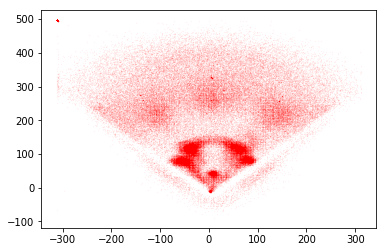

In [6]:
plt.scatter(MLBmap['our.x'],MLBmap['our.y'], s=.001,c='r', marker= '.')

Although this is a scatter plot, we are able to use very small dots and as a result we can see the pattern of where the ball lands more frequently on the baseball diamond. Note that the pattern reveals very clearly the shape of the baseball field, even though the results are drawn from multiple ballparks which have slightly different dimensions. The most intense colors are around the infield bases and the pitcher's mound (at the bottom of the screen). In the outfield, the deepest colors are around the locations where outfielders are typically stationed. Note the space between these outfield locations and the infield has realtively few dots, given that balls which might land there have usually been stopped by an infielder.

# Self test

Use 'x' and 'y' coordinate values to generate the view from the other end of the field.

## Plotting hits

A 'hit' in baseball is is when the batter succeeds in getting on base by hitting the ball. A hit might enable the batter to reach first base (a single), second base (a double), third base (a triple) or to round all the bases (a home run). We now map each of these events for the 2018 season.

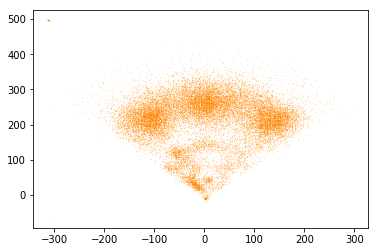

In [7]:
# 2. Plot of singles

Single = MLBmap[MLBmap.event == 'Single']
plt.scatter(Single['our.x'],Single['our.y'], s=.02,c='darkorange', marker= '.')

From the more intensely colored areas, it's clear that singles are scored in two types of situations: (i) when the ball gets over the infield and reaches one of the outfielders (note that there are few singles scored when the ball goes beyond the outfielders because such a hit will likely produce *more* than a single) and (ii) when the ball is hit along the left foul line, typically between the third baseman and pitcher. Such a hit is usually produced by a "bunt", where the batter intends to just touch the ball and let it roll, and use his speed to reach first base before a fielder can recover the ball.

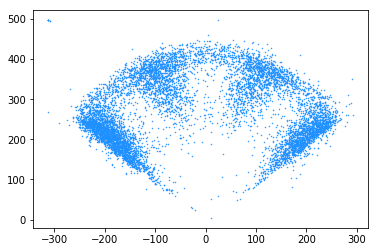

In [8]:
# 3. Plot of doubles

Double = MLBmap[MLBmap.event == 'Double']
plt.scatter(Double['our.x'],Double['our.y'], s=1,c='dodgerblue', marker= '.')

We see quite a different pattern with doubles. A big hit to the infield hardly ever results in a double, and outfield hits are typically hit along the foul lines, over the heads of the outfielders. The spaces within sprinting distance of the outfielders are largely empty, since doubles are usually produced by balls hit into the air and are caught if the outfielders are close enough.

Note that since these events are rarer than singles, we use a larger market size to make sure the distribution is clearly visible.

## Self test

Experiment with different sizes, different markers and different colors to find the best effects.

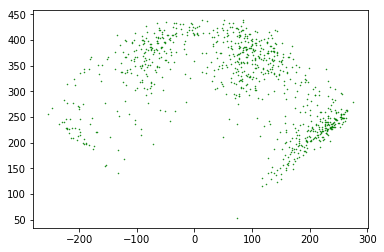

In [9]:
# 4. Plot of triples

Triple = MLBmap[MLBmap.event == 'Triple']
plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='g', marker= '.')

Triples are much rarer even than doubles. Mostly these are created by hits along the right foul line or over the heads of the outfielders.

(0, 500)

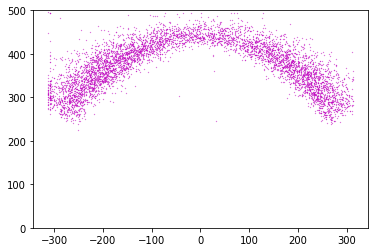

In [10]:
# 5. plot of home runs

Homer = MLBmap[MLBmap.event == 'Home Run']
plt.scatter(Homer['our.x'],Homer['our.y'], s=.20,c='m', marker= '.')
#ax.set(xlim=(-300,300), ylim=(0,450))
plt.ylim((0,500))

By definition, a home run is hit out of the park. This plot therefore not only illustrates the boundaries of the ballparks and the distance the ball is hit, but also, to some extent, the differing dimensions of ballparks. Some of the dots on the inside of the semi-circle would not reach beyond the outfield of some ballparks. 

We can now plot the four scatter diagrams together, to make comparison easier, we can set a common scale for the vertical axis.

(0, 500)

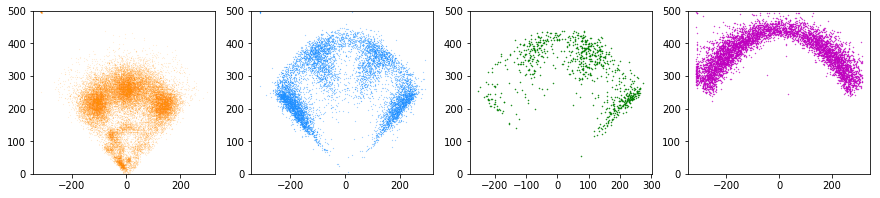

In [11]:
# 6. the four plots: Singles, doubles, triples and home runs

f = plt.figure(figsize=(15,3))
ax = f.add_subplot(141)
ax=plt.scatter(Single['our.x'],Single['our.y'], s=.01,c='darkorange', marker= '.')
plt.ylim((0,500))
ax = f.add_subplot(142)
ax=plt.scatter(Double['our.x'],Double['our.y'], s=.1,c='dodgerblue', marker= '.')
plt.ylim((0,500))
ax = f.add_subplot(143)
ax = plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='g', marker= '.')
plt.ylim((0,500))
ax = f.add_subplot(144)
ax = plt.scatter(Homer['our.x'],Homer['our.y'], s=.5,c='m', marker= '.')
plt.ylim((0,500))

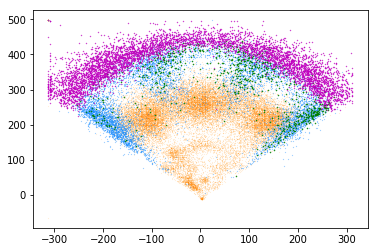

In [12]:
#7. A single plot - the four types of hit on one plot 

ax=plt.scatter(Single['our.x'],Single['our.y'], s=.01,c='darkorange', marker= '.')
ax=plt.scatter(Double['our.x'],Double['our.y'], s=.1,c='dodgerblue', marker= '.')
ax = plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='g', marker= '.')
ax = plt.scatter(Homer['our.x'],Homer['our.y'], s=.5,c='m', marker= '.')

Another way to use the scatter diagram is to compare at-bats which result in a hit, and at-bats that result in an out. First we generate the two scatter plots separately, then we create them alongside each other.

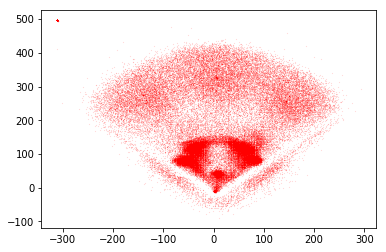

In [13]:
# Outs
Outs = MLBmap[(MLBmap.event == 'Groundout')|(MLBmap.event == 'Flyout')| (MLBmap.event == 'Pop Out')|
             (MLBmap.event == 'Forceout')|(MLBmap.event == 'Lineout')| (MLBmap.event == 'Grounded Into DP')]
plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')

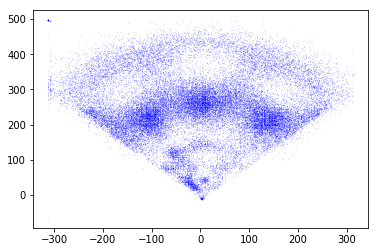

In [14]:
# Hits
Hits = MLBmap[(MLBmap.event == 'Single')|(MLBmap.event == 'Double')| (MLBmap.event == 'Triple')|
             (MLBmap.event == 'Home Run')]
plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')

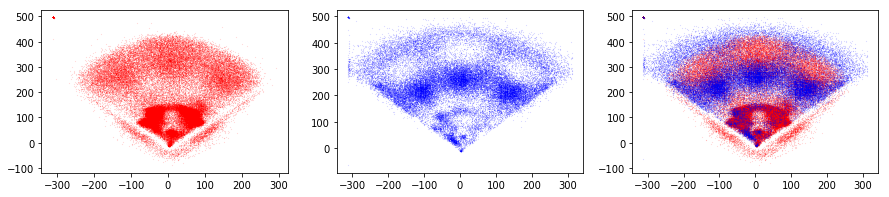

In [15]:
# Hits vs. Outs
f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
ax2 = f.add_subplot(132)
ax2 = plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')
ax3 = f.add_subplot(133)
ax3=plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
ax3=plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')

What is striking about this comparison is that the locations of hits and outs are largely complementary. For example, the densest region of hits is precisely that region between the infield and the outfield where outs are relatively sparse. It is also clear hits which reach the fence (typically home runs) have no corresponding outs, while outs which involve the batter being caught in foul territory have no corresponding hits.

## Self Test

Now look at the category of fielding errors ("Field Error"). Draw a chart of their location. What do you notice?

We now turn to comparing stadiums. Ballparks do not have identical dimensions, and so we can look to see if the pattern of co-ordinates is different. First, it is useful to create a list of stadiums.

In [16]:
# 7. Summary list of stadiums

stadiums = MLBmap.groupby('stadium')['gameId'].count().reset_index()
stadiums

,stadium,gameId
0,AT&T Park,6172
1,Angel Stadium,3202
2,Angel Stadium of Anaheim,2878
3,BB&T Ballpark,75
4,Busch Stadium,6195
5,Chase Field,6229
6,Citi Field,6046
7,Citizens Bank Park,6069
8,Comerica Park,6095
9,Coors Field,6237


Tropicana Field is said to be the smallest ballpark and Dodger Stadium the largest ballpark - so let's compare the heatmaps.

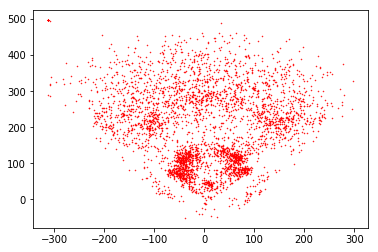

In [17]:
# 8. Tropicana Field

Trop = MLBmap[MLBmap.stadium == 'Tropicana Field']
plt.scatter(Trop['our.x'],Trop['our.y'], s=1,c='r', marker= '.')

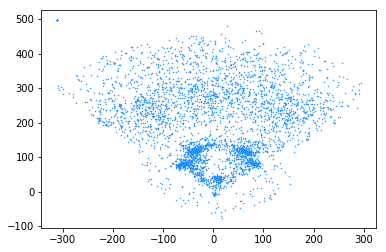

In [18]:
# 9. Dodger Stadium 

Dodge = MLBmap[MLBmap.stadium == 'Dodger Stadium']
plt.scatter(Dodge['our.x'],Dodge['our.y'], s=1,c='dodgerblue', marker= '.')

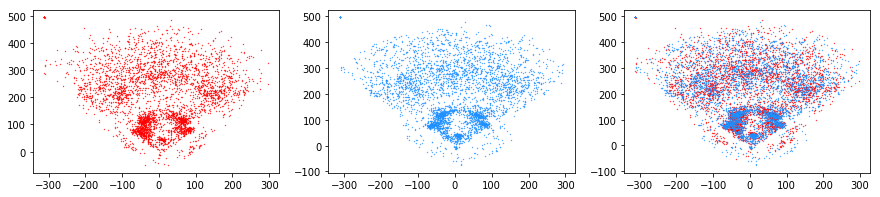

In [19]:
# 10. Tropicana Field and Dodger Stadium

# In fact the heatmaps don't look so different.


f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(Trop['our.x'],Trop['our.y'], s=.5,c='r', marker= '.')
ax2 = f.add_subplot(132)
ax2=plt.scatter(Dodge['our.x'],Dodge['our.y'], s=.5,c='dodgerblue', marker= '.')
ax3 = f.add_subplot(133)
ax3 = plt.scatter(Trop['our.x'],Trop['our.y'], s=.5,c='r', marker= '.')
ax3 = plt.scatter(Dodge['our.x'],Dodge['our.y'], s=.5,c='dodgerblue', marker= '.')

In this case there does not appear to be a significant difference between the distributions.

Another use for this technique is to compare where the players hit. Batters are identified in the data as lefties or righties. First we list all the players, and then choose a righty - Justin Turner, with a lefty Nick Maskakis. As you can see below, they each ranked among the players with the largest numbers of at-bat in 2018.

In [20]:
# 11. Comparing players

# We use a pivot table here to list players by at bats

playersn = MLBmap.groupby('batterId')['batterName'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,batterId,count,unique,top,freq
696,607208,748,1,Turner,748
596,596019,747,1,Lindor,747
276,519317,714,1,Stanton,714
101,455976,710,1,Markakis,710
540,593160,709,1,Merrifield,709
236,514917,709,1,"Hernandez, C",709
510,592518,709,1,Machado,709
254,518692,707,2,Freeman,518
718,608324,707,1,Bregman,707
378,547180,705,1,Harper,705


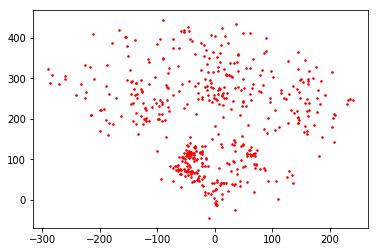

In [21]:
# 12. Compare a righty (R) to a lefty (L)

# Turner (R)

b607208 = MLBmap[MLBmap.batterId == 607208]
plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='r', marker= '.')

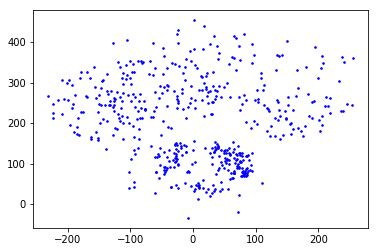

In [22]:
# 13. Markakis (L)

b455976 = MLBmap[MLBmap.batterId == 455976]
plt.scatter(b455976['our.x'],b455976['our.y'], s=10,c='b', marker= '.')

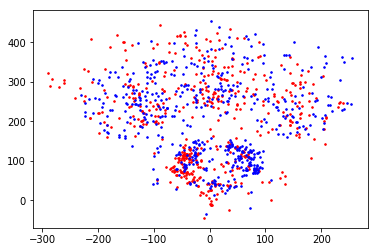

In [23]:
# 14. Turner and Markakis together

plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='r', marker= '.')
plt.scatter(b455976['our.x'],b455976['our.y'], s=10,c='b', marker= '.')


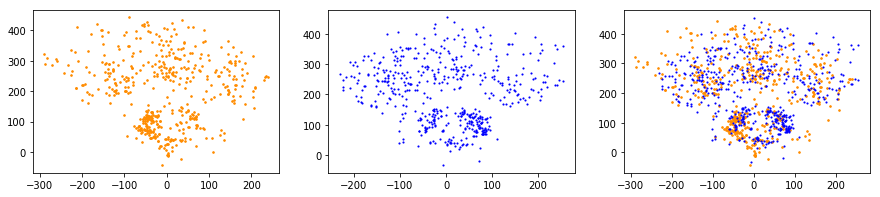

In [24]:
# 15. Turner and Markakis in three plots

f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='darkorange', marker= '.')
ax2 = f.add_subplot(132)
ax2=plt.scatter(b455976['our.x'],b455976['our.y'], s=5,c='b', marker= '.')
ax3 = f.add_subplot(133)
ax3 = plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='darkorange', marker= '.')
ax3 = plt.scatter(b455976['our.x'],b455976['our.y'], s=5,c='b', marker= '.')

This series of charts makes quite clear the difference between the lefty and the righty. Both are "opposite field hitters" - the ball tends to travel toward the side of the field they are facing - rather than being "pull hitters". While both hit roughly equally into centerfield, it's noticeable that they each hit further into the opposite field.



## Self Test

Choose a lefty and righty with more average looking statistics - how do their heatmaps compare?

We now compare all lefties with all righties:

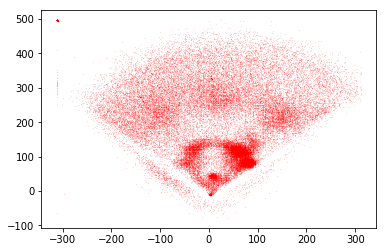

In [25]:
# 16. Overall heatmap for lefties and righties

# Lefties

Left = MLBmap[MLBmap.stand == 'L']
plt.scatter(Left['our.x'],Left['our.y'], s=.01,c='r', marker= '.')


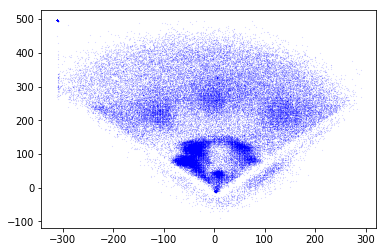

In [26]:
# 17. Righties

Right = MLBmap[MLBmap.stand == 'R']
plt.scatter(Right['our.x'],Right['our.y'], s=.01,c='b', marker= '.')

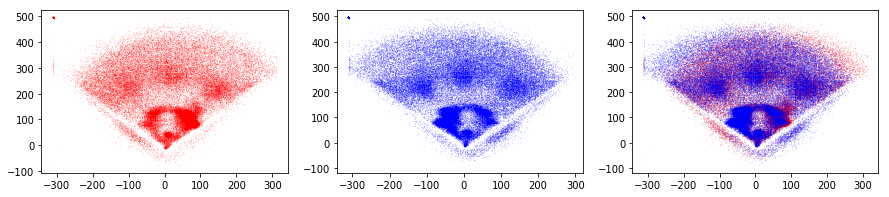

In [27]:
# 18. Lefties and Righties in three plots

f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(Left['our.x'],Left['our.y'], s=.01,c='r', marker= '.')
ax2 = f.add_subplot(132)
ax2=plt.scatter(Right['our.x'],Right['our.y'], s=.01,c='b', marker= '.')
ax3 = f.add_subplot(133)
ax3 = plt.scatter(Left['our.x'],Left['our.y'], s=.01,c='r', marker= '.')
ax3 = plt.scatter(Right['our.x'],Right['our.y'], s=.01,c='b', marker= '.')

What's striking about this comparison is that, in aggregate, both lefties and righties are pull hitters, and are able to hit the ball further when pull hitting. 

# Conclusion

We have shown how simply drawing charts can provide considerable insight into performance statistics of all kinds. Charts allow us to see patterns that we might not otherwise notice. Before moving on to more complex methods of analysis, we examine some plots for basketball data.